# Tutorial 1: Data visualization

---

## Introduction

Welcome!, This tutorial will show you how to visualise biochemical assay data from rooibos tea samples using Python. From this tutorial you will learn:

 - how to read data into python from an Excel file
 - how to use dataframes (pandas package)
 - how to visualise and compare biochemical properties of fermented and unfermented rooibos teas  using histograms
 - how to learn how to use commands using example codes from the Internet

Let's get started! First let's import the Python packages we'll need to load and visualize our data.

_Note_ that you will need to run all the cells in the notebook in order for it to work properly. The best way to do this is run them one by one.  Try to understand what each cell is doing when you run it. In some cells, you will have to write or modify code--just follow the instructions.  

---

First we import some libraries:
* `pandas`  for importing data into data frame format
* `seaborn` for drawing useful graphs, such as bar graphs
* `matplotlib.pyplot` for displaying graphs

Use the aliases `pd` for `pandas`, `sns` for `seaborn`, and `plt` for `matplotlib.pyplot` 

In [19]:
# ___Cell no. 1___

# Exercise 0 code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<b><i> Reading in data </i></b> 

The raw data is contained in the excel file `orig.xlsx` which is in the `data` folder.  `Pandas` has a command `read_excel` that can read data from excel sheets, and convert to a `Pandas` dataframe, which is a very useful structure for handling real data. 

**Exercise 1**: Use `read_excel` to read in the fermented and non-fermented data. The fermented data is is the sheet named `fer`--name your dataframe as `df_fer`. The nonfermented data is is the sheet named `nonfer`--name your dataframe as `df_nf`. 

_Note_: Since the file `orig.xlsx` is in the `data` folder, you should specify the path as `data/orig.xlsx`.

Here are some examples that show the `read_excel` command syntax:
```
pd.read_excel('tmp.xlsx', sheet_name='Sheet3', index_col=0)
pd.read_excel('tmp.xlsx', index_col=None, header=None)  
pd.read_excel('tmp.xlsx', header=0)  
```

In [20]:
# ___Cell no. 2___
### Exercise 1 code goes here
df_fer=pd.read_excel('data\orig.xlsx',sheet_name='fer',index_col=None,header=0)
df_nf=pd.read_excel('data\orig.xlsx',sheet_name='nonfer',index_col=None,header=0)

<b><i> Examining data </i></b> 

The `Pandas` command `head` can be used to display data columns. The `Pandas` data column names are taken from the Excel sheet. 

**Exercise 2**:  Use the `head` command to display the first 5 rows of nonfermented data. 



In [21]:
# ___Cell no. 3___
### Exercise 2 code goes here
df_fer.head(5)

,type,F-H2O,A1-H2O,A2-H2O,F-MEOH,A1-MEOH,A2-MEOH,cut
0,1,457.982012,3791.630281,1053.209972,257.631541,2063.016672,829.673865,RS
1,1,339.713588,2825.660880,627.777353,266.472210,2103.093927,627.469976,RS
2,1,348.809862,3363.905754,657.584108,251.443587,2052.680936,892.081366,RS
3,1,221.543574,2000.789922,360.611685,250.451620,1963.529348,662.888570,RS
4,1,347.776623,3024.878290,730.545849,240.960000,1950.643883,548.189385,RS


---

**Exercise 3:** Show the last 5 rows of fermented data
<br>
_Hint_:  You can't use `head`, you have to use a different command. See if you can guess what the name of the command is.

In [22]:
#  ___ code for Exercise 3 here ____
df_fer.tail(5)

,type,F-H2O,A1-H2O,A2-H2O,F-MEOH,A1-MEOH,A2-MEOH,cut
46,1,194.634564,2288.627545,439.044206,266.894353,2009.084895,593.665985,RFC
47,1,146.808332,1870.789016,302.142912,256.382289,1915.421204,583.329369,RS
48,1,244.991283,2827.315342,534.006355,264.362443,1970.241939,575.849573,RS
49,1,183.092201,2063.834070,376.434045,260.878921,2016.012375,660.284128,RFC
50,1,262.264321,2596.051616,622.477803,267.208005,2075.721981,595.329410,RC


In both dataframes, the rows correspond to different tea samples, while the columns give the values of 8 variables, which can be explained as follows:
-  `type` -- categorical variable denoting one of two types of tea: nonfermented(0) or fermented(1)
- `F-H2O` -- continuous variable: F stands for phenolics and H2O stands for water extract. This column gives the phenolic content that was extracted using water as solvent. 
- `A1-H2O` -- continuous variable: A1 represents "Trolox equivalent antioxidant capacity" (TEAC), which is a measurement of antioxidant activity. H2O is the solvent used for extraction. 
- `A2-H2O` -- continuous variable: A2 represents "Ferric Reducing Antioxidant Power Assay" (FRAP), which is a different measurement of antioxidant activity. As before H2O is the solvent 
- `F-MEOH` -- continuous variable: F stands for phenolics (as above), this time extracted using methanol (MEOH) as solvent instead of water
- `A1-MEOH` -- continuous variable: as above A1 represents TEAC with MEOH as solvent
- `A2-MEOH` -- continuous variable: A2 is for FRAP and MEOH is the solvent. 
- cut -- catagorical variable, indicating the cut of the rooibos (not of interest in this study)

_Note_: Antioxidants have various health benefits. Phenolics are one type of antioxidant.  So the  antioxidant  and phenolic content of different tea varieties is important both to consumers and to rooibos producers. (For more information, you may search on Google.)

In this study, we use these different antioxidant measurements to try to identify whether a rooibos sample is fermented or nonfermented. This can help us better understand the relationship between fermentation and antioxidant content. For example, does fermentation tend to increase or decrease antioxidant content?

**Exercise 4:** Using `print` and the `shape` command from `Pandas`, display the number of samples (rows) and the number of columns (features) of nonfermented and fermented datasets. In your `print` statement include text to identify what you're printing: e.g. `The number of nonfermented samples is ###`.

In [23]:
# ___Cell no. 4___

# Exercise 4 code goes here
print("The number of non-fermented samples is ",df_nf.shape[0])
print("The number of column of non-fermented data is ",df_nf.shape[1])
print("The number of fermented samples is ",df_fer.shape[0])
print("The number of column of non-fermented data is ",df_fer.shape[1])

The number of non-fermented samples is  47
The number of column of non-fermented data is  8
The number of fermented samples is  51
The number of column of non-fermented data is  8


Just so you can see what we're studying, here's a picture of samples of unfermented and fermented rooibos. See if you can guess which is which.
<br>
<br>
<img src="pics/roo.jpg" width="500" height="250">


---

<b><i>Renaming variables</i></b>: 

We will change the variable names to make them more descriptive. 

Here is a screen shot that illustrates column renaming:

<img src="pics/stackoverflow_rename_columns_example.png" width="600" >

**Exercise 5** Use the above reference to write code that does the following renaming for both `df_fer` and `df_nf`:
- Change `F-H2O` to `TPC_H2O`
- Change `A1-H2O` to `TEAC_H2O`
- Change `A2-H2O` to `FRAP_H2O`
- Similarly change `F-MEOH`, `A1-MEOH`, `A2-MEOH` to `TPC_MEOH`, `TEAC_MEOH`, and `FRAP_MEOH` respectively

In [24]:
# ___Cell no. 5___
# Exercise 5a:  rename the columns in df_nf here
df_nf=df_nf.rename(columns={'F-H2O':'TPC_H2O',
                            'A1-H2O':'TEAC_H2O',
                            'A2-H2O':'FRAP_H2O'})
df_nf=df_nf.rename(columns={'F-MEOH':'TPC_MEOH',
                            'A1-MEOH':'TEAC_MEOH',
                            'A2-MEOH':'FRAP_MEOH'})
df_nf.head(2)


,type,TPC_MEOH,TEAC_MEOH,FRAP_MEOH,TPC_H2O,TEAC_H2O,FRAP_H2O,cut
0,0,275.767474,2821.888864,1180.778887,314.33,2588.61,584.61,FC
1,0,253.494375,2355.706326,647.096605,331.41,2818.87,589.91,LL


In [25]:
# ___Cell no. 6___
# Exercise 5b:  rename the columns in df_fer here
df_fer=df_fer.rename(columns={'F-H2O':'TPC_H2O',
                            'A1-H2O':'TEAC_H2O',
                            'A2-H2O':'FRAP_H2O'})
df_fer=df_fer.rename(columns={'F-MEOH':'TPC_MEOH',
                            'A1-MEOH':'TEAC_MEOH',
                            'A2-MEOH':'FRAP_MEOH'})
df_fer.head(2)


,type,TPC_H2O,TEAC_H2O,FRAP_H2O,TPC_MEOH,TEAC_MEOH,FRAP_MEOH,cut
0,1,457.982012,3791.630281,1053.209972,257.631541,2063.016672,829.673865,RS
1,1,339.713588,2825.660880,627.777353,266.472210,2103.093927,627.469976,RS


Let's check and see if the renaming worked as we expected
<br>
**Exercise 6**  Write code to display the column names for the fermented and unfermented data sets.  The following screen shot may be useful

<img src="pics/spark_get_column_names..png" width="600">


In [26]:
# ___Cell no. 7___
# Code for Exercise 6 goes here
column_names_fer=list(df_fer.columns.values)
column_names_nf=list(df_nf.columns.values)
print("The columns names of the fermented data set are ",column_names_fer)
print("The columns names of the non-fermented data set are ",column_names_nf)

The columns names of the fermented data set are  ['type', 'TPC_H2O', 'TEAC_H2O', 'FRAP_H2O', 'TPC_MEOH', 'TEAC_MEOH', 'FRAP_MEOH', 'cut']
The columns names of the non-fermented data set are  ['type', 'TPC_MEOH', 'TEAC_MEOH', 'FRAP_MEOH', 'TPC_H2O', 'TEAC_H2O', 'FRAP_H2O', 'cut']


---

<b><i>Data concatenation into a single frame</i></b>: 

We're just about ready to visualize the data using histograms. For this purpose, it's easier to concatenate the two dataframes into a single frame.

**Exercise 7**: Using the `concat` command from `Pandas`, concatenate the two datasets into a single frame called `df`. Choose the option `ignore_index=True` so that the rows are indexed consecutively. The following screen shot gives an example of `concat`:

<img src="pics/pandas_concat.example.png" width="600">


In [27]:
# ___Cell no. 8___
# Code for Exercise 7 goes here.
df=pd.concat([df_fer,df_nf],ignore_index=True)

---
**Exercise 8:** Display the first 5 lines and last 5 lines of the concatenated frame 'df' 


In [28]:
#  ___ Exercise 8 code here ____
df


,type,TPC_H2O,TEAC_H2O,FRAP_H2O,TPC_MEOH,TEAC_MEOH,FRAP_MEOH,cut
0,1,457.982012,3791.630281,1053.209972,257.631541,2063.016672,829.673865,RS
1,1,339.713588,2825.660880,627.777353,266.472210,2103.093927,627.469976,RS
2,1,348.809862,3363.905754,657.584108,251.443587,2052.680936,892.081366,RS
3,1,221.543574,2000.789922,360.611685,250.451620,1963.529348,662.888570,RS
4,1,347.776623,3024.878290,730.545849,240.960000,1950.643883,548.189385,RS
...,...,...,...,...,...,...,...,...
93,0,273.690000,2433.780000,544.730000,363.079063,2505.134346,972.071852,FC
94,0,315.690000,2655.180000,538.320000,310.298106,2309.382633,842.976612,LL
95,0,264.190000,2294.520000,493.960000,244.626922,1954.413798,645.499415,LL
96,0,322.180000,2685.590000,597.620000,215.835307,2250.341794,762.010361,PS


---

<b><i>Histograms</i></b>: 

At this point, we're ready to plot comparative histograms for the different variables. We want to compare non-fermented versus fermented, which is easy to do using the 'histplot' command from `seaborn`.

If you have done the exercises correctly, you will have two series of bars (blue and orange) in the following plots.

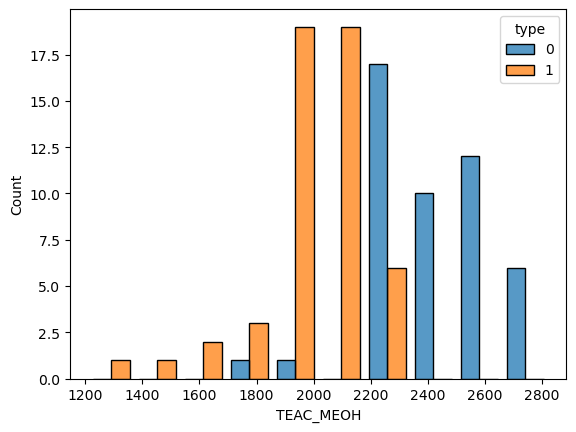

In [29]:
# ___Cell no. 9___
sns.histplot(data=df, x="TEAC_MEOH", hue="type", multiple="dodge", shrink=.8)
plt.show() # shows the plot

The histogram options in the previous code can be explained as follows:

`sns.histplot(data=df, x="TEAC_MEOH", hue="type", multiple="dodge", shrink=.8)`

* `data=df`:  df is the dataframe name
* `x="TEAC_MEOH"`: TEAC_MEOH is the variable value that is histogrammed
* `hue="type"`: This separates the data into two classes according to "type" (0 or 1)
* `multiple = "dodge"`: This offsets the two histograms from each other. An alternative is `multiple = "stack"`. The default is to overlay the histograms.
* shrink = .8:  The histogram bars will occupy 80% of the bin width

It's important to know how to interpret histograms. Here are some questions that can be asked about the data:

<ol style="list-style-type: lower-alpha;">
    <li> Which type (fermented or nonfermented) has the higher mean?</li>
    <li>Which type has the larger variance?</li>
    <li>Which type is more skewed?</li>
    <li>What is the skew of each distribution (right or left)?</li>
    <li> Which of the distributions is bimodal? </li>
</ol>

For the above histogram, here are the answers:
<ol style="list-style-type: lower-alpha;">
    <li> Nonfermented (blue) has the higher mean</li>
    <li> Fermented (orange) has the larger variance.</li>
    <li>Fermented is more skewed.</li>
    <li>Both fermented and unfermented are skewed left.</li>
    <li> Nonfermented is bimodal (but with more data, it's likely that the bimodality will disappear)</li>
</ol>



**Exercise 9** Do plots for the other two methanol measurements. You can do multiple plots from the same cell if we use the 'show() command between plots. Otherwise all the data will be put on the same plot.


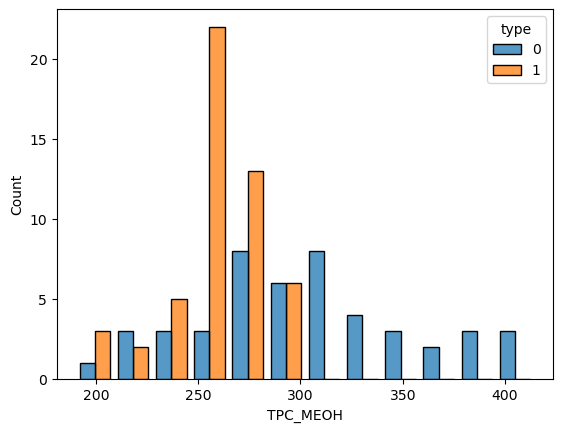

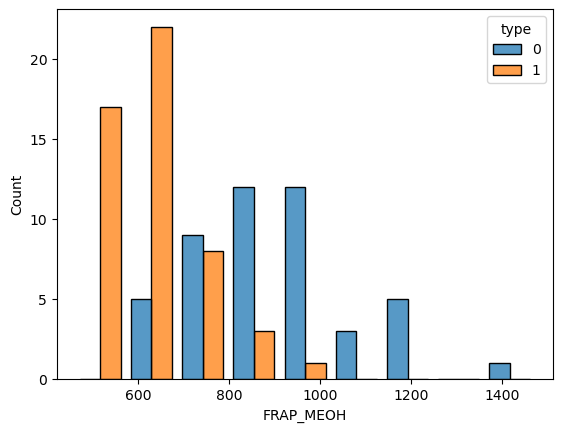

In [30]:
# ___Cell no. 10___
# Code for exercise 9 goes here
sns.histplot(data=df, x="TPC_MEOH", hue="type", multiple="dodge", shrink=.8)
plt.show()
sns.histplot(data=df, x="FRAP_MEOH", hue="type", multiple="dodge", shrink=.8)
plt.show()

**Exercise 10**  For each of the above plots, answer the same questions as in Exercise 9.

FOR TPC_MEOH

a.Fermented (orange) has higher mean.  
b.Fermented (orange) has higher variance.  
c.Fermented (orange) is more skewed.  
d.Fermented is skewed right but non-fermented is not skewed.  
e.Non-fermented is bimodal.

FOR FRAP_MEOH

a.Fermented (orange) has higher mean.  
b.Fermented (orange) has higher variance.  
c.Fermented (orange) is more skewed.  
d.Both of them are skewed left.  
e.Non-fermented is bimodal.


---
**Exercise 11:** Repeat Exercise 9 for the three measurements in water (H2O)

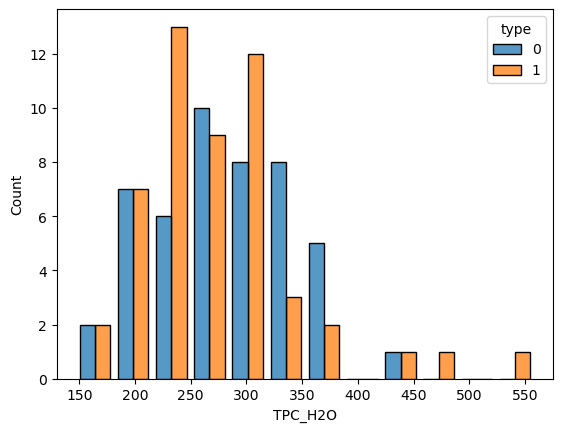

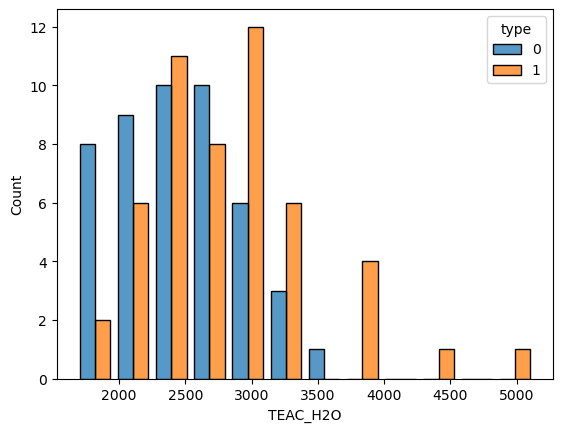

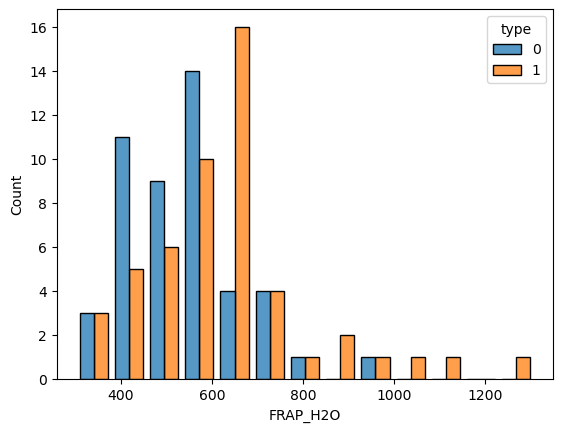

In [31]:
#-------  Your code for Exercise 11 here---
sns.histplot(data=df, x="TPC_H2O", hue="type", multiple="dodge", shrink=.8)
plt.show()
sns.histplot(data=df, x="TEAC_H2O", hue="type", multiple="dodge", shrink=.8)
plt.show()
sns.histplot(data=df, x="FRAP_H2O", hue="type", multiple="dodge", shrink=.8)
plt.show()

**Exercise 12** Repeat Exercise 10 for the three measurements in water

FOR TPC_H2O

a.Non-fermented (blue) has higher mean.  
b.Fermented (orange) has higher variance.  
c.Non-fermented (blue) is more skewed.  
d.Both of them are skewed left.  
e.None of them is bimodal.  

FOR TEAC_H2O

a.Non-fermented (blue) has higher mean.  
b.Fermented (orange) has higher variance.  
c.Non-fermented (blue) is more skewed.  
d.Both of them are skewed left.  
e.Non-fermented is bimodal.  

FOR FRAP_H2O

a.Non-fermented (blue) has higher mean.  
b.Fermented (orange) has higher variance.  
c.Non-fermented (blue) is more skewed.  
d.Both of them are skewed left.  
e.None of them is bimodal.  

**Exercise 13** Based on the above graphs, which feature (i.e. measurement) will be most effective in distinguishing between nonfermented and fermented samples? _Explain_ your answer.

The TEACH_MEOH will be the most effective in distinguish between nonfermented and fermented samples 
because we can define a limit with the less error possible for both fermented and non-fermented samples.

<b><i> Saving data for later use </i></b>

We can save the data so that we can call it up again in the next notebook.  
**Exercise 14**
Using the `%store` command, save the dataframes `df_nf`,`df_fer`, and `df`.  The syntax for `%store` is shown in the following examples:
```
# In the first notebook
data = [1, 2, 3]
%store data
```
```
# In the second notebook
%store -r data
print(data)
```

In [32]:
# Put your code for Exercise 14 here
%store df
%store df_fer
%store df_nf

Stored 'df' (DataFrame)
Stored 'df_fer' (DataFrame)
Stored 'df_nf' (DataFrame)


Congratulations!  You've finished your basic exploration of the data.  In the next notebook we'll go on to more descriptive visualizations.